## Problem Definition

In this project, we're going to build an image classifier. By looking at a person's face, our model is able to predict who that person is. Specifically, we will identify celebrities.

To keep things not complicated, we will have only 5 famous people:
* Cristiano Ronaldo
* Dwayne Johnson
* Elon Musk
* Jimmy Donaldson
* Sundar Pichai

## Importing Prerequisite Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

## Data Collection

In [2]:
img = cv2.imread('./test_image/697fae0a3d03b3aa22be0fc21371cce7.jpg')
img.shape

(480, 640, 3)

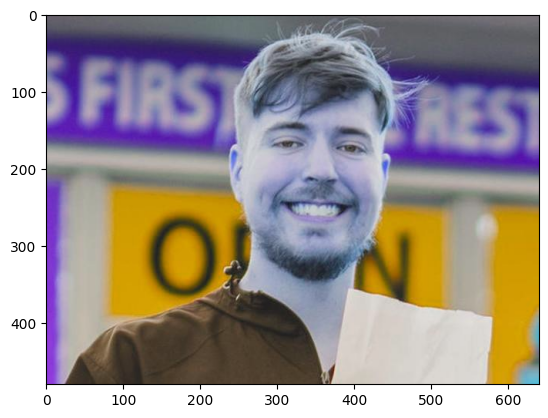

In [3]:
plt.imshow(img);

## Data Cleaning

In order to train the model, we need to detect only images that show clearly the face and 2 eyes.
We will first convert original images into gray ones, then we perform a technique called Haar Cascades from OpenCv to detect faces and eyes. For the output, we only take the faces of the people in those images.
Finally, we store all of the cropped images in a new folder.

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(480, 640)

In [5]:
gray

array([[ 99, 100, 100, ..., 119, 119, 119],
       [ 99, 100, 100, ..., 119, 119, 119],
       [ 99, 100, 100, ..., 119, 119, 119],
       ...,
       [117, 117, 117, ..., 185, 185, 185],
       [117, 117, 117, ..., 184, 184, 184],
       [118, 118, 118, ..., 184, 184, 184]], dtype=uint8)

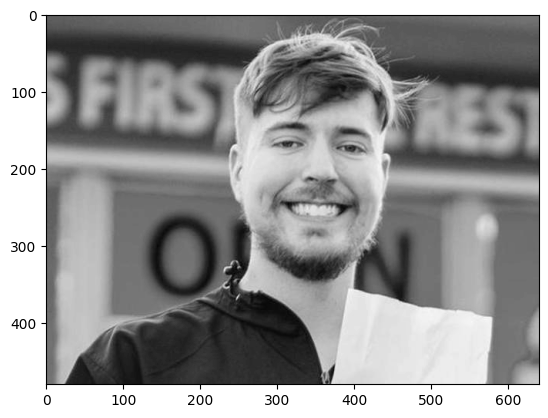

In [6]:
plt.imshow(gray, cmap='gray');

In order to identify a person, we need to look at the face and eyes. Now, we'll use Haar Cascades to detect face and eyes of a person.

In [7]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt.xml')
eyes_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye_tree_eyeglasses.xml')

In [8]:
from urllib.request import Request, urlopen

def detect_face_and_eyes(image):
    img = cv2.imread(image)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.equalizeHist(gray)
    #-- Detect faces
    faces = face_cascade.detectMultiScale(gray)
    for (x,y,w,h) in faces:
        faceROI = gray[y:y+h,x:x+w]
        faceROICOLOR = img[y:y+h,x:x+w]
        #-- In each face, detect eyes
        eyes = eyes_cascade.detectMultiScale(faceROI)
        if len(eyes) >= 2:
            return faceROICOLOR

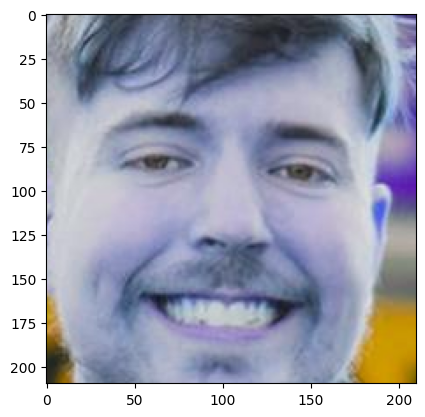

In [9]:
jimmy = detect_face_and_eyes('./test_image/697fae0a3d03b3aa22be0fc21371cce7.jpg')
plt.imshow(jimmy)

In [10]:
jimmy2 = detect_face_and_eyes('./test_image/mrbeast-chocolate-1-968x544.webp')
jimmy2

In [11]:
path_to_data = './dataset/'
path_to_crop = './dataset/cropped/'

In [12]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if (entry.is_dir()) and (entry.path.split('/')[-1] != 'cropped'):
        img_dirs.append(entry.path)
img_dirs

['./dataset/cristiano_ronaldo',
 './dataset/dwayne_johnson',
 './dataset/elon_musk',
 './dataset/jimmy_donaldson',
 './dataset/sundar_pichai']

In [13]:
# import shutil
# if os.path.exists(path_to_crop):
#     shutil.rmtree(path_to_crop)
# os.mkdir(path_to_crop)

In [14]:
cropped_image_dirs = []
file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    name = img_dir.split('/')[-1]
    cropped_folder = path_to_crop + name
    cropped_image_dirs.append(cropped_folder)
    file_names_dict[name] = []
    # if not os.path.exists(cropped_folder):
    #     os.makedirs(cropped_folder)
    print(name)
    print('Generating images in the folder: ', cropped_folder)
    for entry in os.scandir(img_dir):
        try:
            roi_color = detect_face_and_eyes(entry.path)
        except:
            roi_color = None
        if roi_color is not None:
            cropped_file_name = name + str(count) + '.png'
            cropped_file_path = cropped_folder + '/' + cropped_file_name
            
            # cv2.imwrite(cropped_file_path, roi_color)
            file_names_dict[name].append(cropped_file_path)
            count += 1

cristiano_ronaldo
Generating images in the folder:  ./dataset/cropped/cristiano_ronaldo
dwayne_johnson
Generating images in the folder:  ./dataset/cropped/dwayne_johnson
elon_musk
Generating images in the folder:  ./dataset/cropped/elon_musk
jimmy_donaldson
Generating images in the folder:  ./dataset/cropped/jimmy_donaldson
sundar_pichai
Generating images in the folder:  ./dataset/cropped/sundar_pichai


In [15]:
cropped_image_dirs

['./dataset/cropped/cristiano_ronaldo',
 './dataset/cropped/dwayne_johnson',
 './dataset/cropped/elon_musk',
 './dataset/cropped/jimmy_donaldson',
 './dataset/cropped/sundar_pichai']

In [16]:
file_names_dict

{'cristiano_ronaldo': ['./dataset/cropped/cristiano_ronaldo/cristiano_ronaldo1.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo2.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo3.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo4.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo5.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo6.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo7.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo8.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo9.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo10.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo11.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo12.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo13.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo14.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo15.png',
  './dataset/

In [17]:
all_image_files = []
complete_file_names_dict = {}

for image_dir in cropped_image_dirs:
    name = image_dir.split('/')[-1]
    for filename in os.listdir(image_dir):
        all_image_files.append(path_to_crop + name + '/' + filename)
    complete_file_names_dict[name] = all_image_files
    all_image_files = []

In [18]:
complete_file_names_dict

{'cristiano_ronaldo': ['./dataset/cropped/cristiano_ronaldo/cristiano_ronaldo1.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo10.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo100.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo101.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo102.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo103.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo104.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo106.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo107.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo108.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo109.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo11.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo110.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo112.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo115

## Feature Engineering

In this section, we will extract some important features of the cropped images using a technique called Wavelet Transformation. The outputs will be our transformed cropped images.

Finally, we will vertically stack both our original and transformed cropped images (we will feed both images to our model as an input) and split the dataset into X and y

In [19]:
import pywt

def w2d(img, mode='haar', level=1):
    imArray = img
    # Datatype conversions
    # convert to grayscale
    imArray = cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY )
    # convert to float
    imArray =  np.float32(imArray)
    imArray /= 255;
    # compute coefficients 
    coeffs = pywt.wavedec2(imArray, mode, level=level)

    # Process Coefficients
    coeffs_H = list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H = pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H = np.uint8(imArray_H)

    return imArray_H

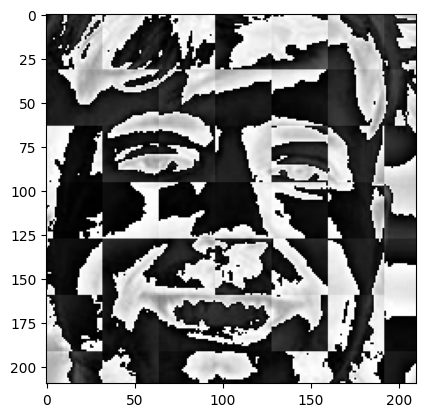

In [20]:
image_haar = w2d(jimmy,'db1',5)
plt.imshow(image_haar, cmap='gray');

In [21]:
name_dict = {}
count = 0
for name in complete_file_names_dict.keys():
    name_dict[name] = count
    count += 1
name_dict

{'cristiano_ronaldo': 0,
 'dwayne_johnson': 1,
 'elon_musk': 2,
 'jimmy_donaldson': 3,
 'sundar_pichai': 4}

In [22]:
X = []
y = []

for name, image_files in file_names_dict.items():
    for image in image_files:
        img = cv2.imread(image)
        if img is None:
            continue
        scaled_raw_img = cv2.resize(img, (32,32))
        transformed_img = w2d(img, 'db1', 5)
        scaled_transformed_img = cv2.resize(transformed_img, (32,32))
        combined_img = np.vstack((scaled_raw_img.reshape(32*32*3,1), scaled_transformed_img.reshape(32*32,1)))
        X.append(combined_img)
        y.append(name_dict[name])

In [23]:
X = np.array(X)
y = np.array(y)

In [24]:
X.shape

(741, 4096, 1)

In [25]:
X = X.reshape(-1,64,64,1)
X.shape

(741, 64, 64, 1)

In [26]:
X[0]

array([[[ 46],
        [ 44],
        [ 44],
        ...,
        [124],
        [154],
        [104]],

       [[118],
        [142],
        [ 93],
        ...,
        [ 65],
        [ 84],
        [ 82]],

       [[ 82],
        [212],
        [215],
        ...,
        [ 48],
        [ 40],
        [ 23]],

       ...,

       [[251],
        [253],
        [251],
        ...,
        [227],
        [ 71],
        [ 10]],

       [[  2],
        [  0],
        [208],
        ...,
        [ 19],
        [137],
        [  4]],

       [[  1],
        [  2],
        [253],
        ...,
        [236],
        [ 27],
        [ 51]]], dtype=uint8)

In [27]:
y[:5]

array([0, 0, 0, 0, 0])

## Model Building

For image classification, the most common solution is using CNN. This model is also said to bring up the most efficient score

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [35]:
from tensorflow.keras import layers, Sequential

cnn = Sequential([
    # data standardization/normalization
    layers.Rescaling(1./255, input_shape=(64,64,1)),
    
    # convolution and pooling
    layers.Conv2D(32,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),

    # dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(5, activation='softmax')
])

cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

cnn.fit(X_train, y_train, epochs=20)

Epoch 1/20
19/19 [==============================] - 3s 96ms/step - loss: 1.6082 - accuracy: 0.2449
Epoch 2/20
19/19 [==============================] - 2s 99ms/step - loss: 1.5130 - accuracy: 0.3142
Epoch 3/20
19/19 [==============================] - 2s 91ms/step - loss: 1.2523 - accuracy: 0.4882
Epoch 4/20
19/19 [==============================] - 2s 89ms/step - loss: 0.9704 - accuracy: 0.6301
Epoch 5/20
19/19 [==============================] - 2s 86ms/step - loss: 0.7660 - accuracy: 0.7027
Epoch 6/20
19/19 [==============================] - 2s 93ms/step - loss: 0.5346 - accuracy: 0.8057
Epoch 7/20
19/19 [==============================] - 2s 86ms/step - loss: 0.5078 - accuracy: 0.8193
Epoch 8/20
19/19 [==============================] - 2s 91ms/step - loss: 0.4685 - accuracy: 0.8311
Epoch 9/20
19/19 [==============================] - 2s 83ms/step - loss: 0.3509 - accuracy: 0.8767
Epoch 10/20
19/19 [==============================] - 2s 83ms/step - loss: 0.2797 - accuracy: 0.8970
Epoch 11/

In [36]:
cnn.evaluate(X_test, y_test)

5/5 [==============================] - 0s 17ms/step - loss: 0.5138 - accuracy: 0.9128


[0.5137727856636047, 0.9127516746520996]

In [37]:
y_pred = cnn.predict(X_test)
argmax_y_pred = []
for py_list in y_pred:
    argmax = np.argmax(py_list)
    argmax_y_pred.append(argmax)
argmax_y_pred = np.array(argmax_y_pred)
argmax_y_pred[:5]

5/5 [==============================] - 0s 15ms/step


array([1, 1, 0, 0, 2], dtype=int64)

In [38]:
y_test[:5]

array([1, 1, 0, 0, 2])

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, argmax_y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        22
           1       0.86      0.79      0.82        38
           2       0.87      0.97      0.92        35
           3       1.00      0.90      0.95        31
           4       0.96      0.96      0.96        23

    accuracy                           0.91       149
   macro avg       0.92      0.92      0.92       149
weighted avg       0.91      0.91      0.91       149



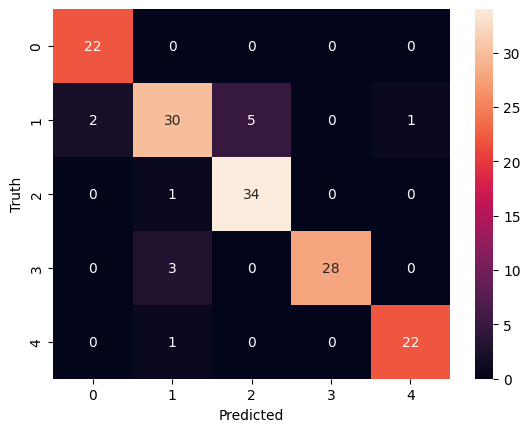

In [40]:
cm = confusion_matrix(y_test, argmax_y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth');

## Exporting Model

For the last step, we will export our CNN model and the dictionary of names. We will use both these files in our UI and backend server.

In [41]:
name_dict

{'cristiano_ronaldo': 0,
 'dwayne_johnson': 1,
 'elon_musk': 2,
 'jimmy_donaldson': 3,
 'sundar_pichai': 4}

In [42]:
import h5py
cnn.save('../server/artifacts/cnn_model.h5')

C:\Users\tangb\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [43]:
import json
with open('../server/artifacts/name_dict.json','w') as f:
    f.write(json.dumps(name_dict))